# 9. Pattern matching, local maxima

Sometimes threholding and binary operations are not appropriate tools to segment image features. This is particularly true when the object to be detected has as specific shape but a very variable intensity or if the image has low contrast. In that case it is useful to attempt to build a "model" of the object and look for similar shapes in the image. It is very similar in essence to convolution, however the operation is normalized so that after filtering every pixel is assigned a value between -1 (anti-correlation) to +1 perfect correlation. One can then look for local matching maxima to identify objects.

In [5]:
from skimage.feature import match_template, peak_local_max
import skimage

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.gray()

<Figure size 432x288 with 0 Axes>

## Virus on electron microscopy

Electron microscopy is a typical case where pixel intensity cannot be directly used for segmentation. For example in the following picture of a virus (obtained from [here](http://res.publicdomainfiles.com/pdf_view/29/13512183019720.jpg)), even though we see the virus as white disks, many other regions are as bright.

In [11]:
#load the image to process
image = skimage.io.imread('../data/virus_EM.tif')

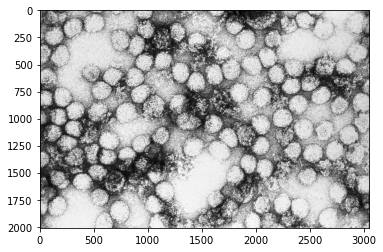

In [12]:
plt.imshow(image);

What is unique to the virus is the shape of the objects. So let's try to make a model of them to do template matching. Essentially a virus appears as a white disk surrounded by a thin dark line:

In [13]:
radius = 90

template = np.zeros((220,220))
center = [(template.shape[0]-1)/2,(template.shape[1]-1)/2]
Y, X = np.mgrid[0:template.shape[0],0:template.shape[1]]
dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
template[dist_from_center<=radius] = 1
template[dist_from_center>radius+3] = 1

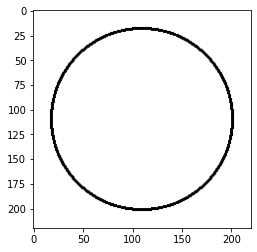

In [14]:
plt.imshow(template)

Now we do the template matching. Note that we specify the option ```pad_input``` to make sure the coordinates of the local maxima is not affected by boreder effects (try to turn it to ```False``` to see the effecf):

In [15]:
matched = match_template(image=image, template=template, pad_input=True)

And this is how the matched image looks like. Wherever there's a particle a local maximum appears.

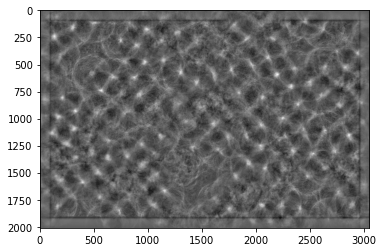

In [16]:
plt.imshow(matched)

We can try to detect the local maxima to have the position of each particle. For that we use the scipy ```peak_local_max``` function. We specify that two maximia cannot be closer than 20 pixels (```min_distance```) and we also set a threshold on the quality of matching (```threshold_abs```). We also want to recover a list of indices rather than a binary mask of local maxima.

In [18]:
local_max_indices = peak_local_max(matched, min_distance=60, threshold_abs=0.1)

Finally we can plot the result:

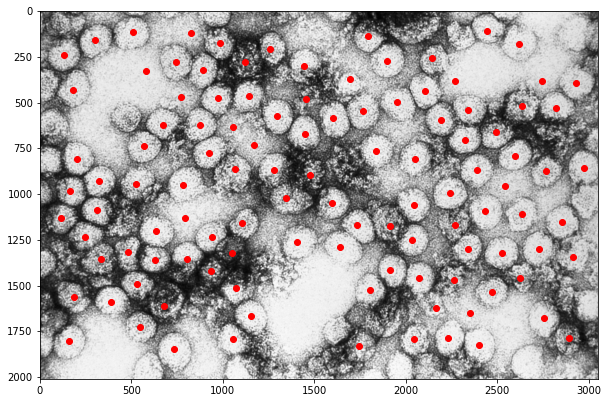

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.plot(local_max_indices[:,1],local_max_indices[:,0],'ro')
plt.show()